# Titanic Survival Prediction
All the data was taken from kaggle.com
https://www.kaggle.com/competitions/titanic/

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV


In [225]:
# Read the data
df_train = pd.read_csv('data\\train.csv')
df_test = pd.read_csv('data\\test.csv')

In [226]:
# Data exploration
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data cleaning

In [227]:

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [228]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [229]:
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)


In [230]:
df_train.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

In [231]:
df_train.drop('PassengerId', axis=1, inplace=True)


In [232]:
df_train.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

In [233]:
#fill missing age values with mean
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

In [234]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [235]:
#convert categorical values to numerical values
df_train["Sex"].replace(["male", "female"], [0, 1], inplace=True)
df_test["Sex"].replace(["male", "female"], [0, 1], inplace=True)

## Data visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


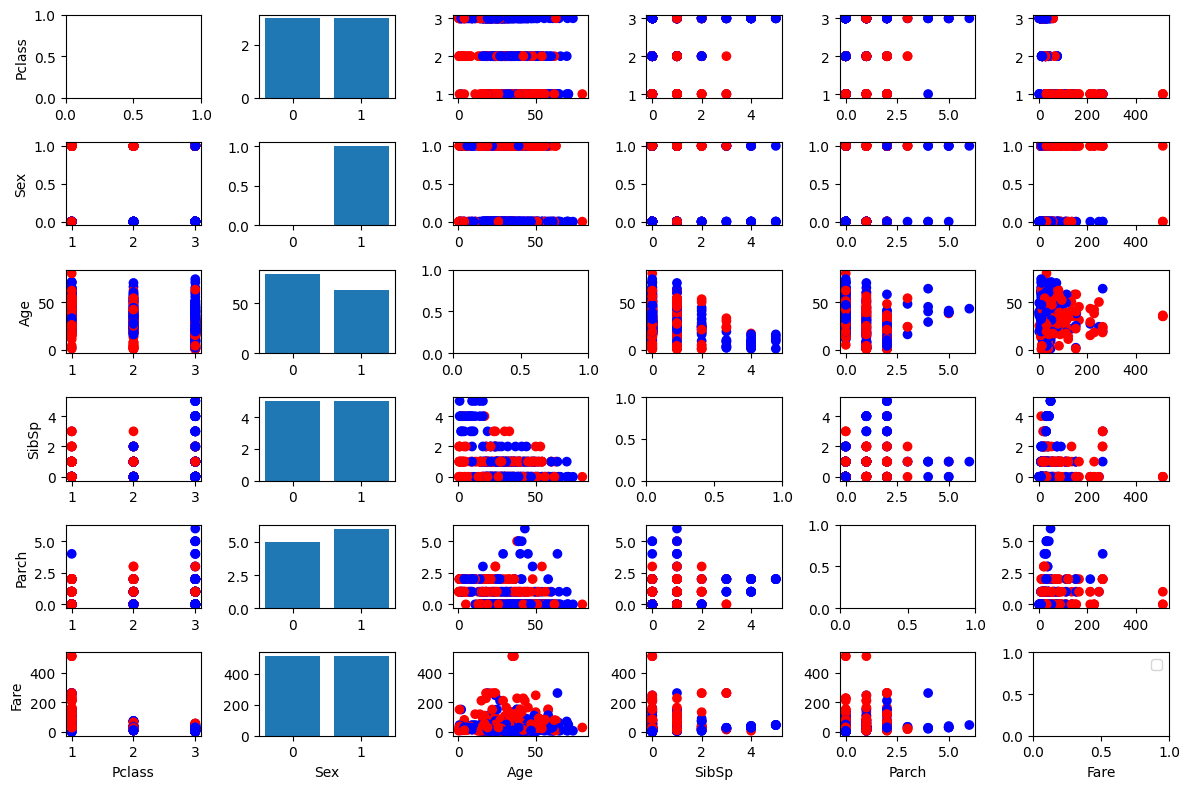

In [167]:
fig, ax = plt.subplots(6, 6,figsize=(12, 8))
for i in range(1, 7, 1):
    for j in range(1, 7, 1):
        if i != j and j != 2:
            ax[i-1, j-1].scatter(df_train.iloc[:, j], df_train.iloc[:, i], c=df_train['Survived'], cmap='bwr')
        elif j == 2:
            ax[i-1, j-1].bar(df_train.iloc[:, j],df_train.iloc[:, i])


        if i == 6:
            ax[i-1, j-1].set_xlabel(df_train.columns[j])
        if j == 1:
            ax[i-1, j-1].set_ylabel(df_train.columns[i])
plt.legend()
plt.tight_layout()

## Model selection

In [168]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived', axis=1), df_train['Survived'], test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [250]:
#function to print the accuracy of all models of the grid search
def print_results(grid):
    print(grid.best_estimator_)
    print("Train score: ", grid.best_score_)
    print("Test score: ", grid.best_estimator_.score(X_test, y_test))


In [251]:
#train and test random forest classifier
params = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
rf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(rf, params, cv=5)
clf.fit(X_train, y_train)
print_results(clf)

RandomForestClassifier(max_depth=7, random_state=0)
Train score:  0.8301449275362319
Test score:  0.8181818181818182


In [252]:
#train and test support vector classifier
from sklearn.svm import SVC
params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001]}

clf = GridSearchCV(SVC(), params)
clf.fit(X_train, y_train)
print_results(clf)


SVC(C=100, gamma=1)
Train score:  0.8214187643020594
Test score:  0.8041958041958042


In [253]:
from sklearn.tree import DecisionTreeClassifier
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf = GridSearchCV(DecisionTreeClassifier(), params)
clf.fit(X_train, y_train)

print_results(clf)

DecisionTreeClassifier(max_depth=3)
Train score:  0.8126926010678872
Test score:  0.8181818181818182


In [254]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

clf = GridSearchCV(KNeighborsClassifier(), params)

clf.fit(X_train, y_train)

print_results(clf)


KNeighborsClassifier(n_neighbors=4)
Train score:  0.8161403508771929
Test score:  0.8111888111888111


In [255]:
from sklearn.linear_model import LogisticRegression
params = {'C': [0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogisticRegression(), params)

clf.fit(X_train, y_train)

print_results(clf)

LogisticRegression(C=10)
Train score:  0.7915942028985508
Test score:  0.8391608391608392


In [256]:
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

clf = GridSearchCV(GradientBoostingClassifier(), params)

clf.fit(X_train, y_train)

print_results(clf)

GradientBoostingClassifier(n_estimators=90)
Train score:  0.8284515636918384
Test score:  0.8181818181818182


In [266]:
from sklearn.neural_network import MLPClassifier
params = {'hidden_layer_sizes': [(10,), (50,), (100,)], 'alpha': [0.0001, 0.001, 0.01, 0.1]}
clf = GridSearchCV(MLPClassifier(), params)
clf.fit(X_train, y_train)

print_results(clf)

c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

MLPClassifier(hidden_layer_sizes=(50, 100))
Train score:  0.8266361556064075
Test score:  0.7972027972027972


c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [175]:
import tensorflow as tf

In [176]:
#setup model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

#train model
model.fit(X_train, y_train, epochs=200, batch_size=32)

#test model
model.evaluate(X_test, y_test)

Epoch 1/200
18/18 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4781
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.7391
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.7373
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.7496
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.7443
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.7513
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.7531
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.7758
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.7706
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7898
Epoch 11/

[0.42892494797706604, 0.8181818127632141]

In [202]:
rf = RandomForestClassifier(max_depth=7, random_state=0)

params = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
          "max_features": [2, 3, 4, 5, 6]}

clf = GridSearchCV(rf, params, cv=5)

clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_estimator_)

0.8336842105263159
RandomForestClassifier(max_depth=7, max_features=4, max_leaf_nodes=8,
                       n_estimators=10, random_state=0)


In [288]:

lre = LogisticRegression(C=10)

lre.fit(X_train, y_train)



LogisticRegression(C=10)

In [289]:
#predict test data
df_test["Fare"].fillna(df_test["Fare"].mean(), inplace=True)

lre.predict(df_test.drop('PassengerId', axis=1))


c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [290]:
#write predictions to csv file
df_test["Survived"] = lre.predict(df_test.drop('PassengerId', axis=1))
df_test[['PassengerId', 'Survived']].to_csv('data\\predictions.csv', index=False)

c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
